In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
# from sklearn.manifold import Isomap, TSNE, MDS
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import random
import warnings 
import pickle
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df2=pd.read_csv('audio_features.csv')
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989,audio_features,1zWZvrk13cL8Sl3VLeG57F,spotify:track:1zWZvrk13cL8Sl3VLeG57F,https://api.spotify.com/v1/tracks/1zWZvrk13cL8...,https://api.spotify.com/v1/audio-analysis/1zWZ...,227693,4
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,audio_features,5kNe7PE09d6Kvw5pAsx23n,spotify:track:5kNe7PE09d6Kvw5pAsx23n,https://api.spotify.com/v1/tracks/5kNe7PE09d6K...,https://api.spotify.com/v1/audio-analysis/5kNe...,227427,4
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056,audio_features,6GsAD8PgHxmEuIPTG8GP3M,spotify:track:6GsAD8PgHxmEuIPTG8GP3M,https://api.spotify.com/v1/tracks/6GsAD8PgHxmE...,https://api.spotify.com/v1/audio-analysis/6GsA...,186080,4
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006,audio_features,6Knv6wdA0luoMUuuoYi2i1,spotify:track:6Knv6wdA0luoMUuuoYi2i1,https://api.spotify.com/v1/tracks/6Knv6wdA0luo...,https://api.spotify.com/v1/audio-analysis/6Knv...,192191,4
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000,audio_features,0i5el041vd6nxrGEU8QRxy,spotify:track:0i5el041vd6nxrGEU8QRxy,https://api.spotify.com/v1/tracks/0i5el041vd6n...,https://api.spotify.com/v1/audio-analysis/0i5e...,208960,4


In [4]:
data=df.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


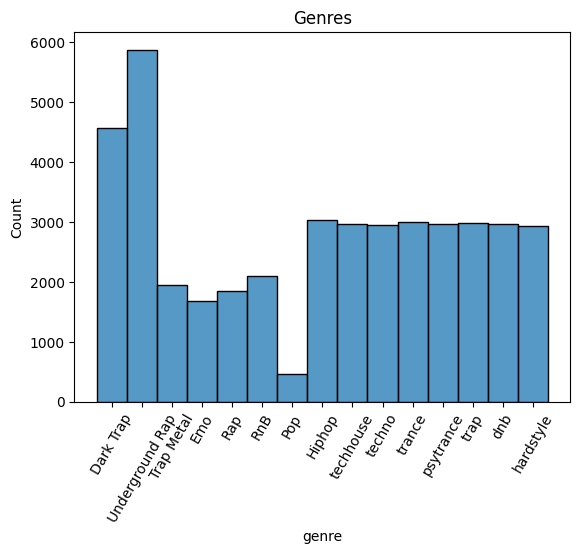

In [5]:
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

In [20]:
dataCopy=data.copy()
data = data.replace("Trap Metal", "Rap")
data = data.replace("Underground Rap", "Rap")
data = data.replace("Emo", "Rap")
data = data.replace("RnB", "Rap")
data = data.replace("Hiphop", "Rap")
data = data.replace("Dark Trap", "Rap")

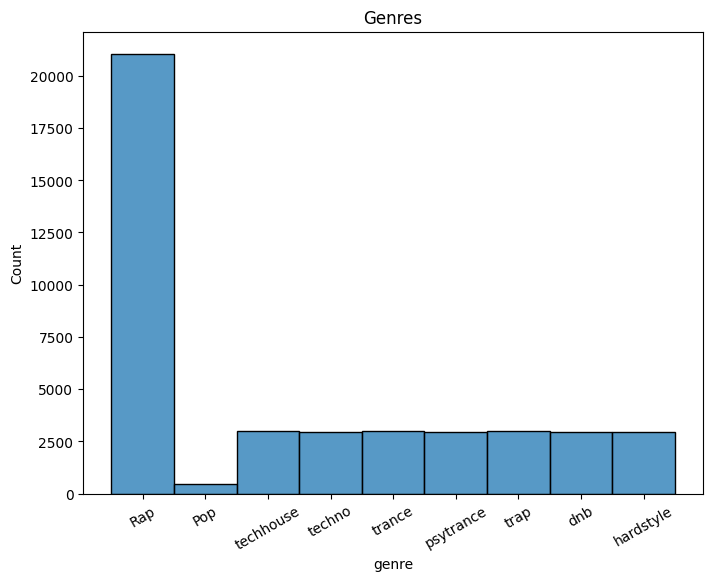

In [19]:
plt.subplots(figsize=(8,6))
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=30)
_ = plt.title('Genres')

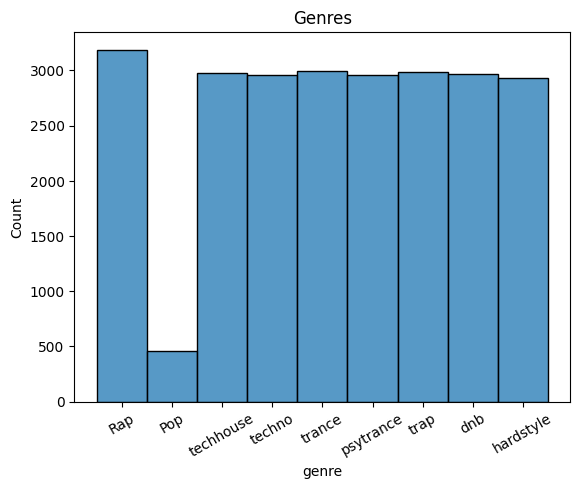

In [36]:
rows_drop = [] 

for i in range(len(data)): 
  if data.iloc[i]['genre'] == 'Rap': 
    if random.random()<0.85: 
      rows_drop.append(i) 
data.drop(index = rows_drop, inplace=True) 

ax = sns.histplot(data["genre"]) 
_ = plt.xticks(rotation=30) 
_ = plt.title("Genres")

In [37]:
x = data.loc[:,:"tempo"]
y = data["genre"]

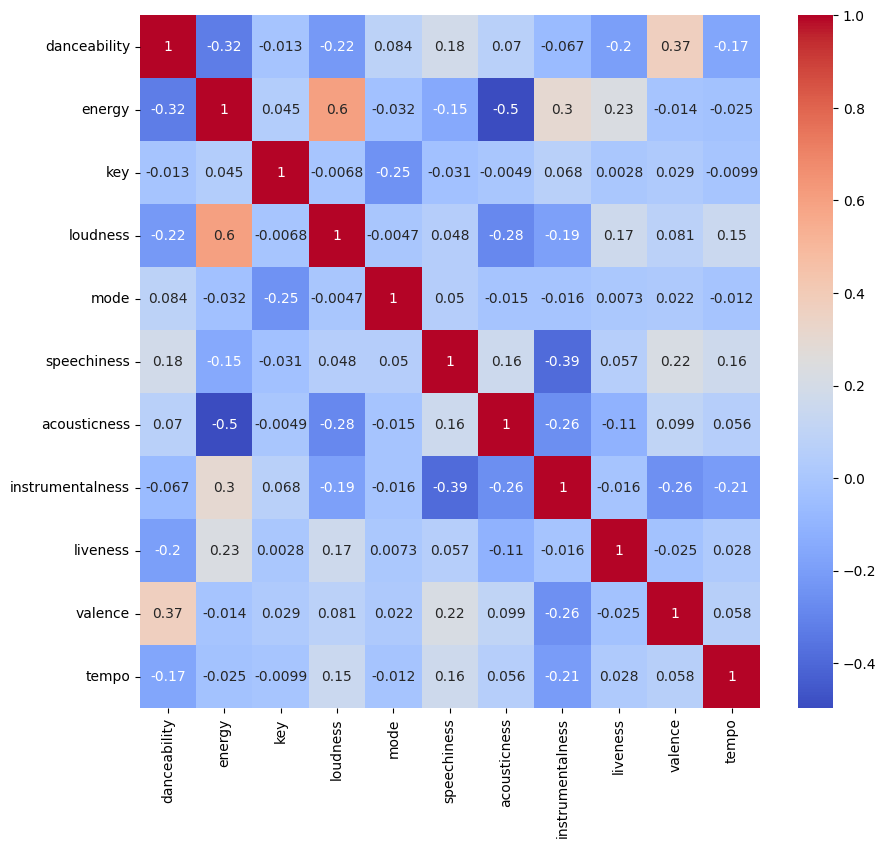

In [15]:
plt.subplots(figsize=(10,9))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

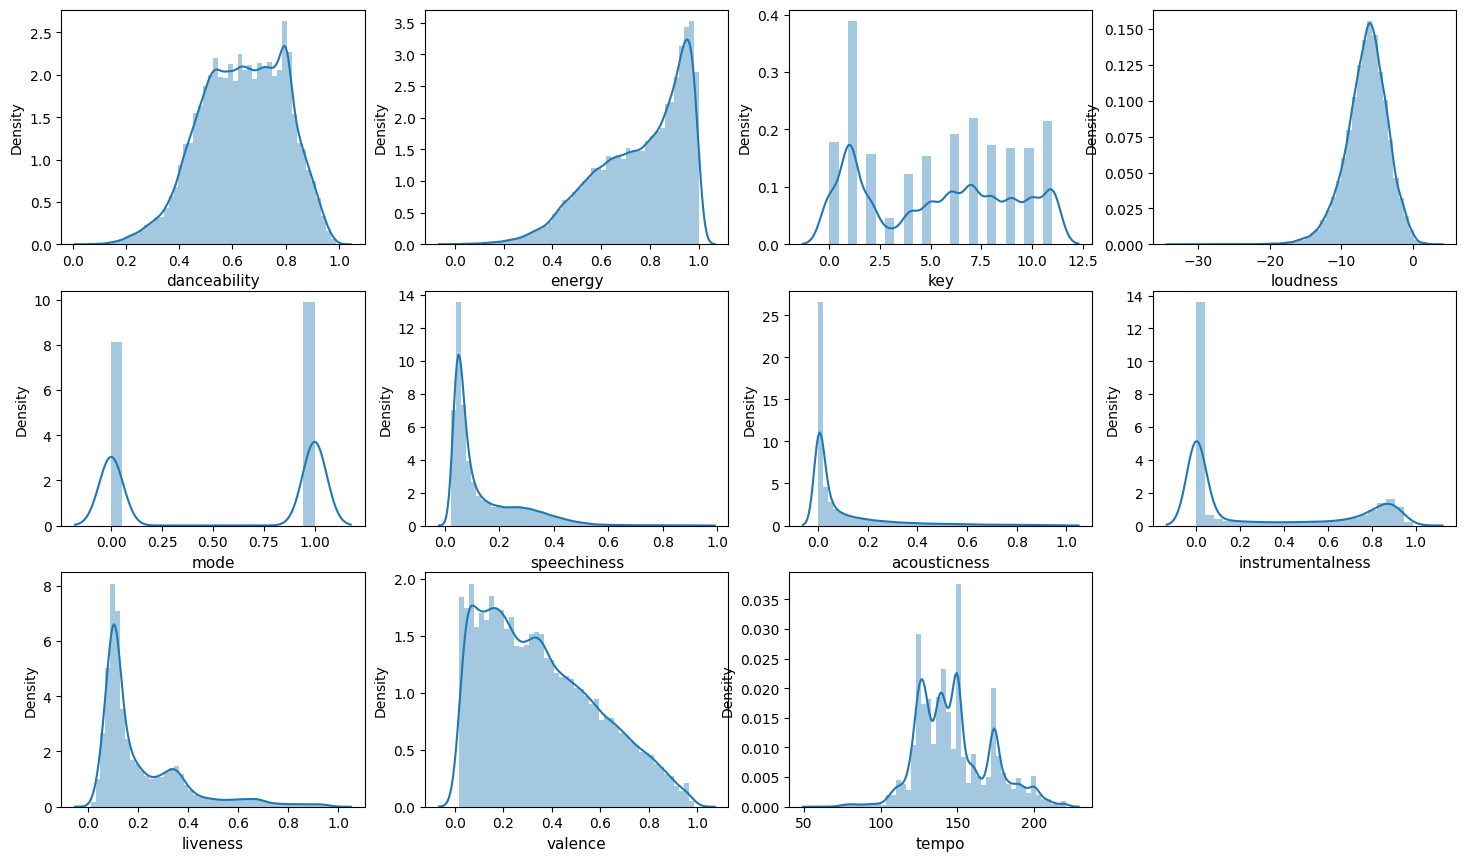

In [9]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42,shuffle=True )

In [39]:
col = xtrain.columns
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [40]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [52]:
# pickle.dump(scalerx,open('scaler.pkl','wb'))
# pickle.dump(le,open('encoder.pkl','wb'))

In [45]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(xtrain,ytrain)
  return grid

def report(model):
  print(model.best_params_)
  preds=model.predict(xtest)
  cm=metrics.confusion_matrix(ytest,preds)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(ytest,preds))
  print('training accuracy:',model.best_score_)
  print('testing accuracy:',metrics.accuracy_score(ytest,preds))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


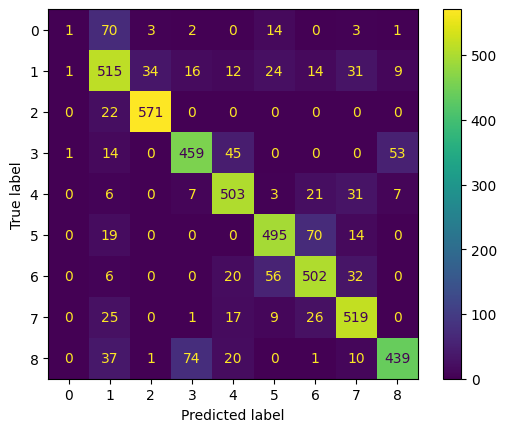

0.8050041734696145
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        94
           1       0.72      0.79      0.75       656
           2       0.94      0.96      0.95       593
           3       0.82      0.80      0.81       572
           4       0.82      0.87      0.84       578
           5       0.82      0.83      0.83       598
           6       0.79      0.81      0.80       616
           7       0.81      0.87      0.84       597
           8       0.86      0.75      0.80       582

    accuracy                           0.82      4886
   macro avg       0.77      0.74      0.74      4886
weighted avg       0.81      0.82      0.81      4886

0.8194842406876791


In [42]:
from sklearn.svm import SVC

svc=train_model(SVC(random_state=0),{})
report(svc)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


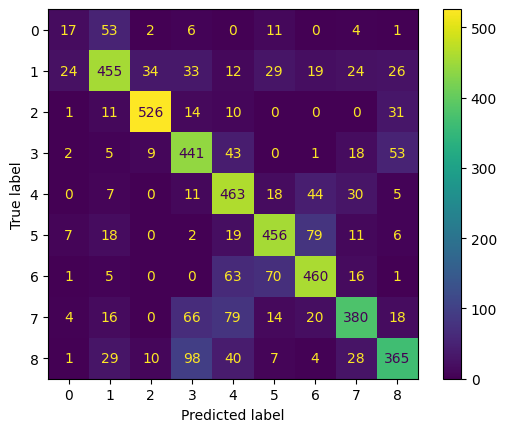

              precision    recall  f1-score   support

           0       0.30      0.18      0.23        94
           1       0.76      0.69      0.73       656
           2       0.91      0.89      0.90       593
           3       0.66      0.77      0.71       572
           4       0.64      0.80      0.71       578
           5       0.75      0.76      0.76       598
           6       0.73      0.75      0.74       616
           7       0.74      0.64      0.69       597
           8       0.72      0.63      0.67       582

    accuracy                           0.73      4886
   macro avg       0.69      0.68      0.68      4886
weighted avg       0.73      0.73      0.73      4886

0.7088109652720358
0.7292263610315186


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn=train_model(KNeighborsClassifier(),{'n_neighbors':[3,5,7]})
report(knn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


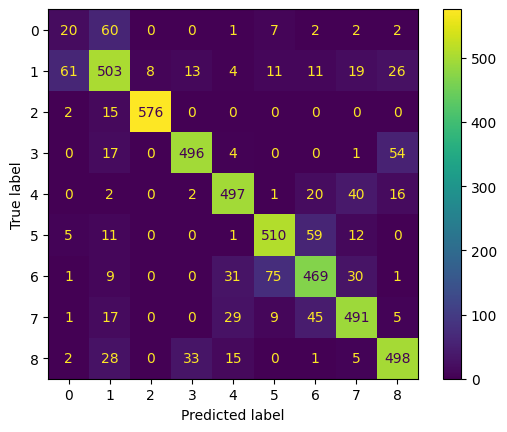

              precision    recall  f1-score   support

           0       0.22      0.21      0.22        94
           1       0.76      0.77      0.76       656
           2       0.99      0.97      0.98       593
           3       0.91      0.87      0.89       572
           4       0.85      0.86      0.86       578
           5       0.83      0.85      0.84       598
           6       0.77      0.76      0.77       616
           7       0.82      0.82      0.82       597
           8       0.83      0.86      0.84       582

    accuracy                           0.83      4886
   macro avg       0.78      0.77      0.77      4886
weighted avg       0.83      0.83      0.83      4886

training accuracy: 0.8089440905877363
testing accuracy: 0.830945558739255


In [46]:
from sklearn.tree import  DecisionTreeClassifier

dt=train_model(DecisionTreeClassifier(random_state=42),{})
report(dt)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


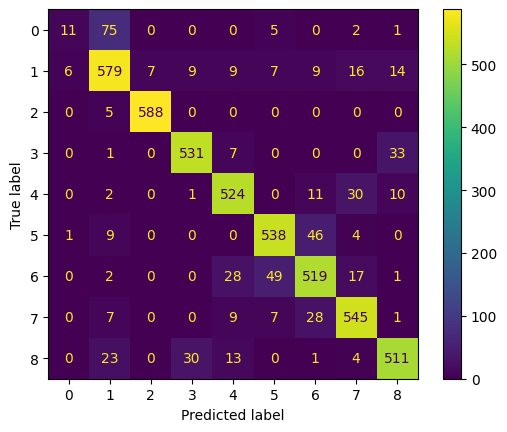

              precision    recall  f1-score   support

           0       0.61      0.12      0.20        94
           1       0.82      0.88      0.85       656
           2       0.99      0.99      0.99       593
           3       0.93      0.93      0.93       572
           4       0.89      0.91      0.90       578
           5       0.89      0.90      0.89       598
           6       0.85      0.84      0.84       616
           7       0.88      0.91      0.90       597
           8       0.89      0.88      0.89       582

    accuracy                           0.89      4886
   macro avg       0.86      0.82      0.82      4886
weighted avg       0.89      0.89      0.88      4886

training accuracy: 0.8755629942568942
testing accuracy: 0.8894801473598035


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf=train_model(RandomForestClassifier(random_state=42),{})
report(rf)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


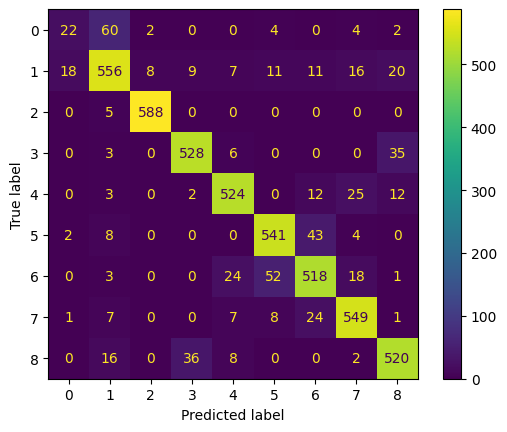

              precision    recall  f1-score   support

           0       0.51      0.23      0.32        94
           1       0.84      0.85      0.84       656
           2       0.98      0.99      0.99       593
           3       0.92      0.92      0.92       572
           4       0.91      0.91      0.91       578
           5       0.88      0.90      0.89       598
           6       0.85      0.84      0.85       616
           7       0.89      0.92      0.90       597
           8       0.88      0.89      0.89       582

    accuracy                           0.89      4886
   macro avg       0.85      0.83      0.83      4886
weighted avg       0.89      0.89      0.89      4886

training accuracy: 0.8804237530625537
testing accuracy: 0.8894801473598035


In [50]:
from xgboost import XGBClassifier

xgb=train_model(XGBClassifier(),{})
report(xgb)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


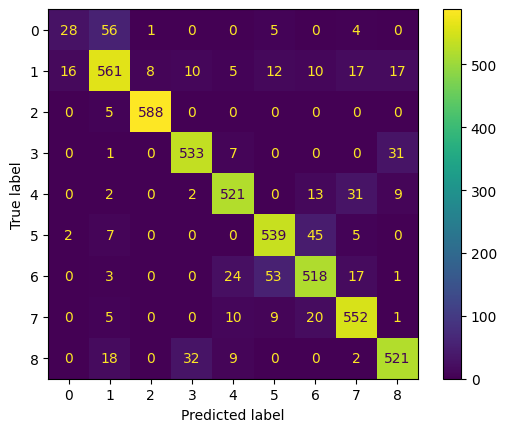

              precision    recall  f1-score   support

           0       0.61      0.30      0.40        94
           1       0.85      0.86      0.85       656
           2       0.98      0.99      0.99       593
           3       0.92      0.93      0.93       572
           4       0.90      0.90      0.90       578
           5       0.87      0.90      0.89       598
           6       0.85      0.84      0.85       616
           7       0.88      0.92      0.90       597
           8       0.90      0.90      0.90       582

    accuracy                           0.89      4886
   macro avg       0.86      0.84      0.85      4886
weighted avg       0.89      0.89      0.89      4886

training accuracy: 0.8810888062651606
testing accuracy: 0.8925501432664756


In [51]:
from lightgbm import LGBMClassifier

lgbm=train_model(LGBMClassifier(verbose=0),{})
report(lgbm)

In [58]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 10, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                     

In [59]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 100,
                verbose = 1, batch_size = 128,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/100
153/153 [==============================] - 5s 14ms/step - loss: 1.0972 - accuracy: 0.6230 - val_loss: 2.3404 - val_accuracy: 0.2124
Epoch 2/100
153/153 [==============================] - 2s 15ms/step - loss: 0.6625 - accuracy: 0.7682 - val_loss: 2.2292 - val_accuracy: 0.3170
Epoch 3/100
153/153 [==============================] - 3s 18ms/step - loss: 0.5816 - accuracy: 0.7933 - val_loss: 1.3417 - val_accuracy: 0.5307
Epoch 4/100
153/153 [==============================] - 3s 18ms/step - loss: 0.5442 - accuracy: 0.8012 - val_loss: 0.5358 - val_accuracy: 0.8029
Epoch 5/100
153/153 [==============================] - 3s 18ms/step - loss: 0.5235 - accuracy: 0.8118 - val_loss: 0.4880 - val_accuracy: 0.8254
Epoch 6/100
153/153 [==============================] - 2s 15ms/step - loss: 0.5092 - accuracy: 0.8177 - val_loss: 0.4482 - val_accuracy: 0.8385
Epoch 7/100
153/153 [==============================] - 3s 17ms/step - loss: 0.4996 - accuracy: 0.8195 - val_loss: 0.4583 - val_accuracy:

In [60]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))


611/611 [==============================] - 4s 6ms/step - loss: 0.3487 - accuracy: 0.8722
[0.3487131893634796, 0.8722370266914368]
153/153 [==============================] - 1s 4ms/step - loss: 0.3890 - accuracy: 0.8637
[0.3889800012111664, 0.8636921644210815]


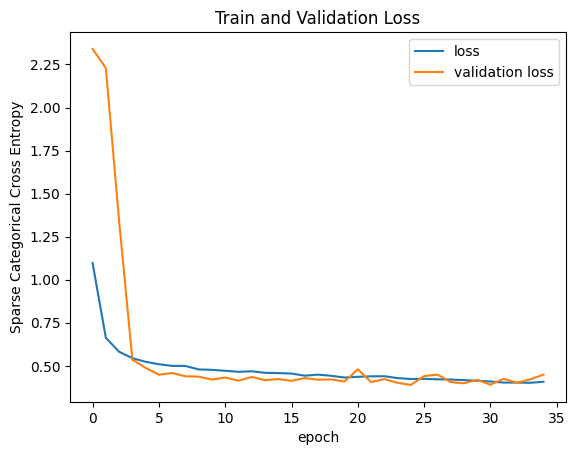

In [61]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

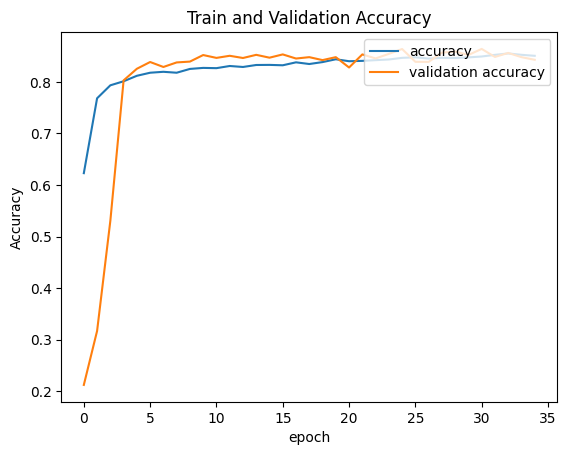

In [62]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [63]:
ypred = model.predict(xtest).argmax(axis=1)

153/153 [==============================] - 1s 3ms/step


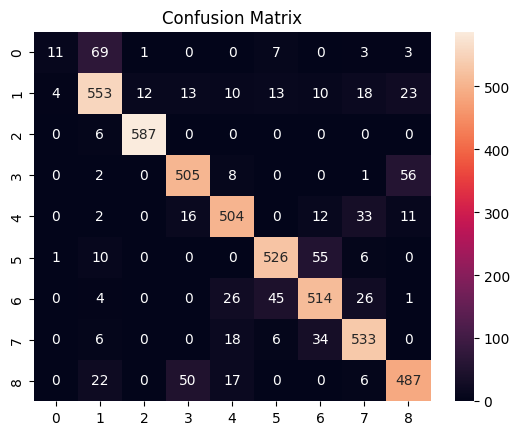

In [64]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [65]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.12      0.20        94
           1       0.82      0.84      0.83       656
           2       0.98      0.99      0.98       593
           3       0.86      0.88      0.87       572
           4       0.86      0.87      0.87       578
           5       0.88      0.88      0.88       598
           6       0.82      0.83      0.83       616
           7       0.85      0.89      0.87       597
           8       0.84      0.84      0.84       582

    accuracy                           0.86      4886
   macro avg       0.85      0.79      0.80      4886
weighted avg       0.86      0.86      0.86      4886

